In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# Load the Boston Housing dataset
dataset = pd.read_csv("Processed_DJI.csv")
dataset=dataset.drop("Date",axis=1)
dataset=dataset.drop("Name",axis=1)

In [3]:
# Preprocessing to handle missing values
# Replace NaNs with mean of respective columns
dataset.fillna(dataset.mean(), inplace=True)
dataset

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,10428.049805,-0.450989,0.000443,0.000446,0.000447,0.000447,0.218703,0.433604,0.653819,0.880570,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,10583.959961,-0.450989,0.014951,0.000446,0.000447,0.000447,0.218703,0.433604,0.653819,0.880570,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,10572.019531,-0.450989,-0.001128,0.014951,0.000447,0.000447,0.218703,0.433604,0.653819,0.880570,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,10573.679688,0.515598,0.000157,-0.001128,0.014951,0.000447,0.218703,0.433604,0.653819,0.880570,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,10606.860352,9.776045,0.003138,0.000157,-0.001128,0.014951,0.218703,0.433604,0.653819,0.880570,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,23461.939453,6.511740,-0.004304,0.000260,0.000374,0.000392,-0.230990,0.261016,1.290420,2.718486,...,-0.24,-0.62,-0.34,-0.27,-0.61,-0.44,-0.45,0.53,-0.26,0.32
1980,23422.210938,-0.991838,-0.001693,-0.004304,0.000260,0.000374,-0.496952,-0.051116,0.401138,2.406860,...,-0.27,-0.58,-0.20,-0.17,0.18,-0.07,-0.05,0.70,-0.71,-0.80
1981,23439.699219,-65.347705,0.000747,-0.001693,-0.004304,0.000260,-0.461690,0.389567,0.712119,2.102797,...,-0.38,0.72,-0.04,0.10,0.06,0.12,0.11,-1.85,0.83,0.16
1982,23409.470703,-1.387911,-0.001290,0.000747,-0.001693,-0.004304,-0.627237,0.137871,-0.137742,1.791640,...,-0.39,0.17,-0.21,-0.15,-0.70,-0.71,-0.70,1.00,0.01,0.24


In [4]:
# Split the dataset into features and target
X = dataset.drop(columns=["DTB6"])
y = dataset["DTB6"]

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Regression Model
regression_model = Sequential([
    Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dense(64, activation='relu'),
    Dense(1)
])

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# MEAN SQUARED ERROR

In [8]:
# Compile the model
regression_model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Train the model
history = regression_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1120 - val_loss: 0.0441
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0219 - val_loss: 0.0301
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121 - val_loss: 0.0258
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079 - val_loss: 0.0224
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060 - val_loss: 0.0194
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - val_loss: 0.0188
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - val_loss: 0.0173
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032 - val_loss: 0.0172
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 - val_loss: 0.0167
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0165
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - val_loss: 0.0159
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

In [10]:
# Evaluate the model on training set
train_loss = regression_model.evaluate(X_train_scaled, y_train)
print("Training Loss:", train_loss)

# Evaluate the model on testing set
test_loss = regression_model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1468e-04
Training Loss: 0.00011394180182833225
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 
Test Loss: 0.004602717235684395


In [11]:
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

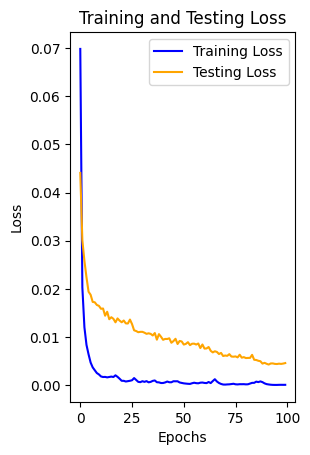

In [12]:
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

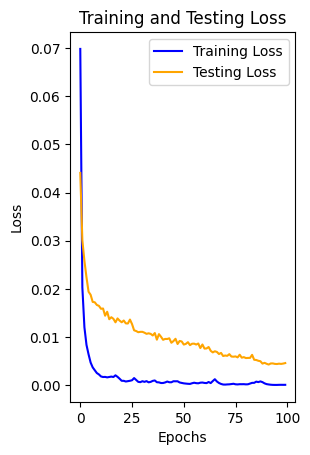

In [13]:
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [14]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# MEAN ABSOLUTE ERROR

In [15]:
# Compile the model with Mean Absolute Error loss metric
regression_model.compile(optimizer='adam', loss='mean_absolute_error')

In [16]:
# Train the model
history = regression_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0203 - val_loss: 0.0485
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0178 - val_loss: 0.0471
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0161 - val_loss: 0.0457
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0161 - val_loss: 0.0454
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158 - val_loss: 0.0433
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143 - val_loss: 0.0436
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0145 - val_loss: 0.0434
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160 - val_loss: 0.0412
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0146 - val_loss: 0.0413
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141 - val_loss: 0.0417
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0133 - val_loss: 0.0407
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

In [17]:
# Evaluate the model on training set
train_loss = regression_model.evaluate(X_train_scaled, y_train)
print("Training Loss:", train_loss)

# Evaluate the model on testing set
test_loss = regression_model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073
Training Loss: 0.0073907868936657906
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0198 
Test Loss: 0.019406119361519814


In [18]:
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

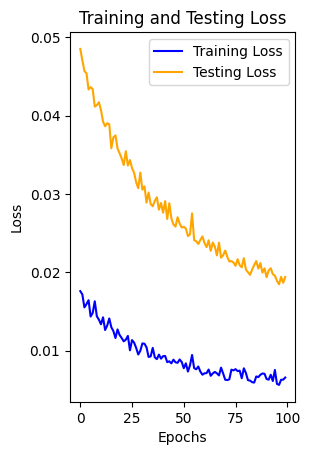

In [19]:
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [20]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>